## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Create Path to create folder into a string
path = r'C:\Users\E054746\OneDrive - RSM\Data Analytics\CareerFoundry\Data Immersion\Achievement 6\US Regional Sales Analysis'

In [4]:
# Import US Regional Sales Data (scrubbed version)
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'us_regional_sales_clean_020222.pkl'))

In [5]:
df.shape

(7991, 37)

#### Question 2

In [6]:
# set the max columns to none
pd.set_option('display.max_columns', None)
df.head()

,Order_Number,Sales_Channel,Warehouse_Code,Procured_Date,Order_Date,Months_In_Stock,Ship_Date,Days_To_Process_Order,Delivery_Date,Days_In_Transit,SalesTeam_ID,Customer_ID,Store_ID,Product_ID,Order_Quantity,Discount_Applied,Unit_Price,Unit_Cost,Discounted_Price_PU,Total_Sale,Total Cost,Total Profit,Customer_Names,Product_Name,City_Name,County,State_Code,State,Type,Latitude,Longitude,Population,Household_Income,Median_Income,Time_Zone,Region,Sales_Team
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,5,2018-06-14,14,2018-06-19,5,6,15,259,12,5,0.075,1963.1,1001.181,1815.8675,9079.3375,5005.905,4073.4325,Rochester Ltd,Dining Furniture,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,213776,68789,80327,America/New York,Northeast,Joshua Bennett
1,SO - 0005035,In-Store,WARE-UHY1004,2019-08-23,2020-01-08,4,2020-01-15,7,2020-01-21,6,6,47,259,1,3,0.150,1755.4,1298.996,1492.0900,4476.2700,3896.988,579.2820,Niconovum Corp,Cookware,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,213776,68789,80327,America/New York,Northeast,Joshua Bennett
2,SO - 0006409,In-Store,WARE-UHY1004,2020-03-10,2020-06-17,3,2020-07-03,16,2020-07-12,9,6,41,259,16,5,0.075,3544.3,2020.251,3278.4775,16392.3875,10101.255,6291.1325,Weimei Corp,Stemware,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,213776,68789,80327,America/New York,Northeast,Joshua Bennett
3,SO - 0006713,In-Store,WARE-UHY1004,2020-03-10,2020-07-21,4,2020-08-15,25,2020-08-16,1,6,48,259,6,3,0.075,2492.4,1246.200,2305.4700,6916.4100,3738.600,3177.8100,"Fenwal, Corp",Computers,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,213776,68789,80327,America/New York,Northeast,Joshua Bennett
4,SO - 0007028,In-Store,WARE-NMK1003,2020-06-18,2020-08-29,2,2020-09-11,13,2020-09-14,3,6,44,112,14,3,0.200,3993.2,3034.832,3194.5600,9583.6800,9104.496,479.1840,Winthrop,Mirrors,Waterbury (Town),New Haven County,CT,Connecticut,Town,41.55850,-73.03668,108802,40213,40467,America/New York,Northeast,Joshua Bennett


In [19]:
# Create a new df removing categorical values and only keeping numerical values
df1 = df[['Months_In_Stock',
          'Days_To_Process_Order',
          'Days_In_Transit',
          'SalesTeam_ID',
          'Customer_ID',
          'Store_ID',
          'Product_ID',
          'Order_Quantity',
          'Discounted_Price_PU',
          'Total_Sale',
          'Total Cost',
          'Total Profit',
          'Population',
          'Household_Income']]

In [20]:
df1.head()

,Months_In_Stock,Days_To_Process_Order,Days_In_Transit,SalesTeam_ID,Customer_ID,Store_ID,Product_ID,Order_Quantity,Discounted_Price_PU,Total_Sale,Total Cost,Total Profit,Population,Household_Income
0,5,14,5,6,15,259,12,5,1815.8675,9079.3375,5005.905,4073.4325,213776,68789
1,4,7,6,6,47,259,1,3,1492.0900,4476.2700,3896.988,579.2820,213776,68789
2,3,16,9,6,41,259,16,5,3278.4775,16392.3875,10101.255,6291.1325,213776,68789
3,4,25,1,6,48,259,6,3,2305.4700,6916.4100,3738.600,3177.8100,213776,68789
4,2,13,3,6,44,112,14,3,3194.5600,9583.6800,9104.496,479.1840,108802,40213


#### Question 3 Use the elbow technique 

In [21]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [22]:
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-2429595356364837.0,
 -1028130691318106.1,
 -428686173377437.75,
 -215589960760977.22,
 -115578987017872.3,
 -66806737240442.66,
 -37331081428069.71,
 -25169592089563.715,
 -19429990347570.574]

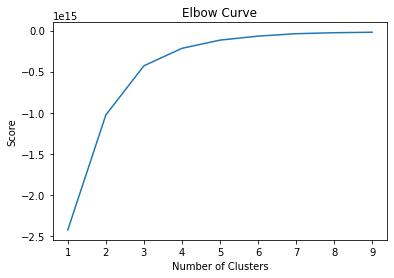

In [23]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Question 4 - Determine the number of clusters and explain your decision
- Looking the elbow curve, there is a jump between cluster 2 and 3. After cluster 3, you see that the curve rises slightly. For this reason, I will choose 3 clusters to run my algorithm.

#### Question 5 Run the k-means algorithm

In [24]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) #Note new version does no use n_jobs anymore.

In [25]:
# Fit the k-means object to the data.

kmeans.fit(df1)

KMeans(n_clusters=3)

#### Question 6 attach a new column to your dataframe with the resulting clusters

In [26]:
df1['clusters'] = kmeans.fit_predict(df1)

C:\Users\E054746\AppData\Local\Temp/ipykernel_44708/865444660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['clusters'] = kmeans.fit_predict(df1)


In [27]:
df1.head()

,Months_In_Stock,Days_To_Process_Order,Days_In_Transit,SalesTeam_ID,Customer_ID,Store_ID,Product_ID,Order_Quantity,Discounted_Price_PU,Total_Sale,Total Cost,Total Profit,Population,Household_Income,clusters
0,5,14,5,6,15,259,12,5,1815.8675,9079.3375,5005.905,4073.4325,213776,68789,0
1,4,7,6,6,47,259,1,3,1492.0900,4476.2700,3896.988,579.2820,213776,68789,0
2,3,16,9,6,41,259,16,5,3278.4775,16392.3875,10101.255,6291.1325,213776,68789,0
3,4,25,1,6,48,259,6,3,2305.4700,6916.4100,3738.600,3177.8100,213776,68789,0
4,2,13,3,6,44,112,14,3,3194.5600,9583.6800,9104.496,479.1840,108802,40213,0


In [28]:
df1['clusters'].value_counts()

0    7699
1     279
2      13
Name: clusters, dtype: int64

#### Question 7 Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

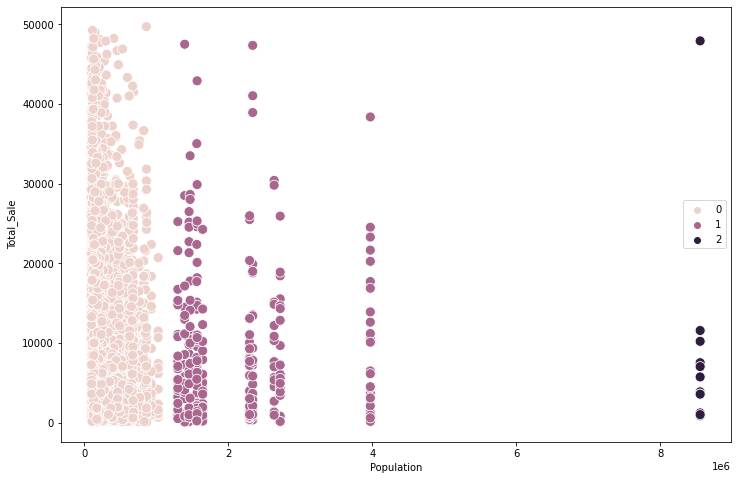

In [29]:
# Plot the clusters for the "Total_Sale" and "Population" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Population'], y=df1['Total_Sale'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Population') # Label x-axis.
plt.ylabel('Total_Sale') # Label y-axis.
plt.show()

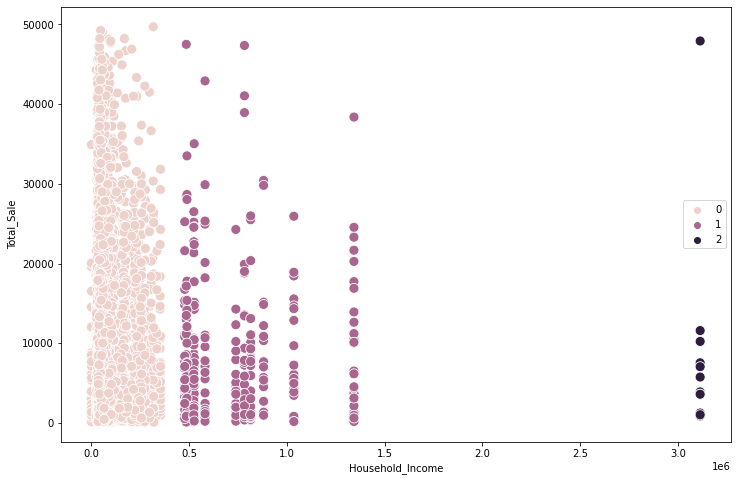

In [30]:
# Plot the clusters for the "Total_Sale" and "Household_Income" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Household_Income'], y=df1['Total_Sale'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Household_Income') # Label x-axis.
plt.ylabel('Total_Sale') # Label y-axis.
plt.show()

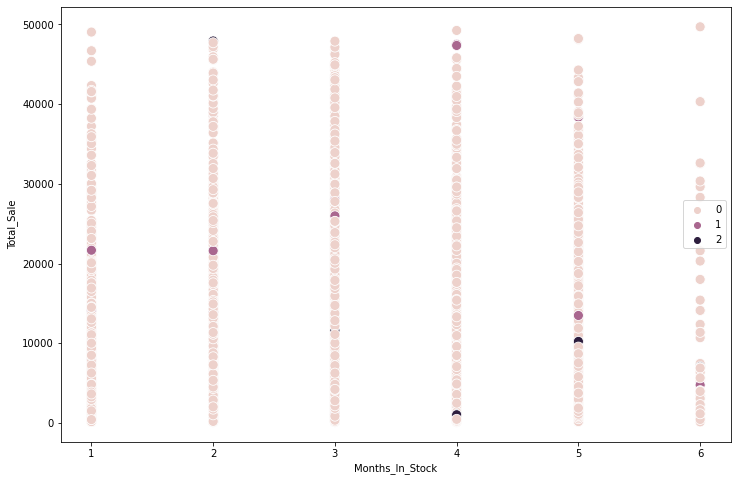

In [32]:
# Plot the clusters for the "Total_Sale" and "Months_In_Stock" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Months_In_Stock'], y=df1['Total_Sale'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Months_In_Stock') # Label x-axis.
plt.ylabel('Total_Sale') # Label y-axis.
plt.show()

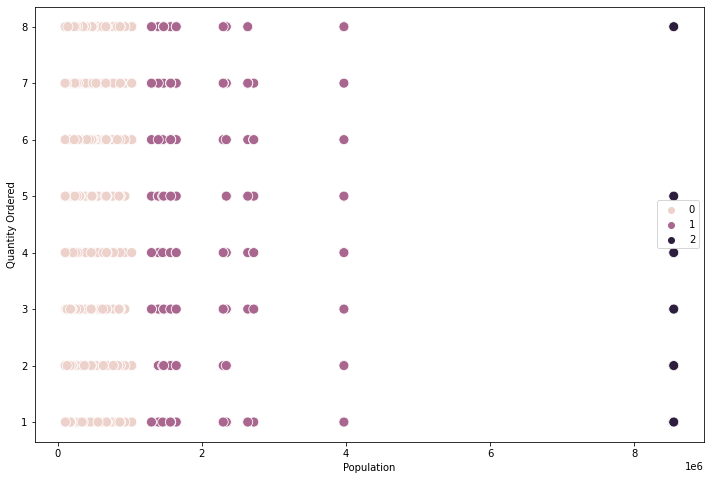

In [34]:
# Plot the clusters for the "Total_Sale" and "Product_ID" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Population'], y=df1['Order_Quantity'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Population') # Label x-axis.
plt.ylabel('Quantity Ordered') # Label y-axis.
plt.show()

#### Question 8 Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.
- I decided to use 4 scatterplots to see if I found any associations
- In the first two scatter plots Population and Household when compared to total sales, It's interesting to see that while there was no linear correlation between population and total sales, it seems that those in less populated areas drive most of the total sales. But the total sales for lower populations are all over the place - from lower to higher sales. The same can be said by household income. Those in the lower income categopry are driving sales in different ranges. 
- I also wanted to see if the the number of months products were in stock affected the total sales. In this case, the number of months a product is in inventory does not seem to impact the total sales.
- Finally, I wanted to see if Population against quantity ordered. Again, I'm seeing a similar pattern with Population and Sales - you see that cluster 0 purcahses quanity from all ranges, while cluster 2 stays within 1-5 quanitities, with one outlier of 8. 

#### Question 9 Calculate the descriptive statistics

In [36]:
df1.loc[df1['clusters'] == 2, 'cluster'] = 'dark purple'
df1.loc[df1['clusters'] == 1, 'cluster'] = 'purple'
df1.loc[df1['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\E054746\Anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\E054746\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [38]:
df1.groupby('cluster').agg({'Population':['mean', 'median'], 
                         'Household_Income':['mean', 'median'], 
                         'Months_In_Stock':['mean', 'median'],
                          'Order_Quantity':['mean', 'median'],
                          'Total_Sale':['mean', 'median']})

Population            Household_Income             \
                     mean     median             mean     median   
cluster                                                            
dark purple  8.550405e+06  8550405.0     3.113535e+06  3113535.0   
pink         2.167185e+05   151451.0     7.749737e+04    52540.0   
purple       2.029366e+06  1567442.0     7.186009e+05   581050.0   

            Months_In_Stock        Order_Quantity          Total_Sale  \
                       mean median           mean median         mean   
cluster                                                                 
dark purple        4.153846    4.0       2.769231    2.0  8102.078077   
pink               3.097935    3.0       4.534745    5.0  9158.928109   
purple             3.017921    3.0       4.347670    4.0  9044.678208   

                       
               median  
cluster                
dark purple  3892.030  
pink         6135.525  
purple       5969.700

#### Question 10 Propose what these results could be useful for in future steps of an analytics pipeline.
- Judging the statistics and plots above, you can see that the pink cluster has the best stats, followed by the purple cluster. It also looks like these two clusters have better sales than the dark purple cluster. However, the population range and household income range are wide in range. Take for example the mean population for the pink cluster. The mean is 216,718.5 while the population mean for the purple cluster is 2,029,366. The scatterplots shows us that most of the orders came from those populations with an average population of 216,000 followed by those populations that had over 2 million people. 
- When I looked at the sales bar chart however (see below), California, located in the West, has a large population and had the best sales. What I would like to see if other states in the West that are less populated are bringing in more sales.
- The chart below also indicates that the South region is the second best region. This region might be the region with those areas that are less populated. 

C:\Users\E054746\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\E054746\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


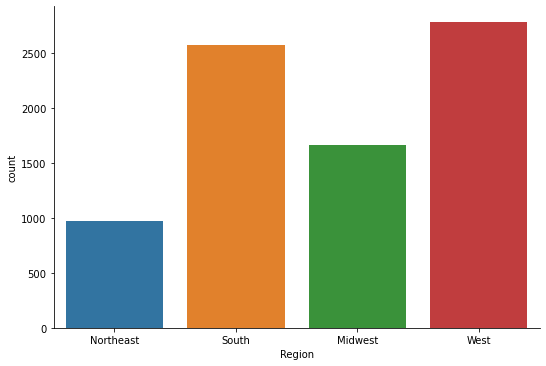

In [39]:
# plot the number of orders by region
sns.factorplot('Region', data=df, kind='count', aspect=1.5)